In [ ]:
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립 사용

#1. 활성화 함수의 특징 - 비선형 함수(Nonlinear function)

활성화 함수는 선형 함수가 아닌 비선형 함수여야 함.

비선형함수는 직선 1개로는 그릴 수 없는 함수 의미

인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야함. 만약 활성화 함수로 선형 함수를 사용하게 되면 은닉층을 쌓을 수가 없음.

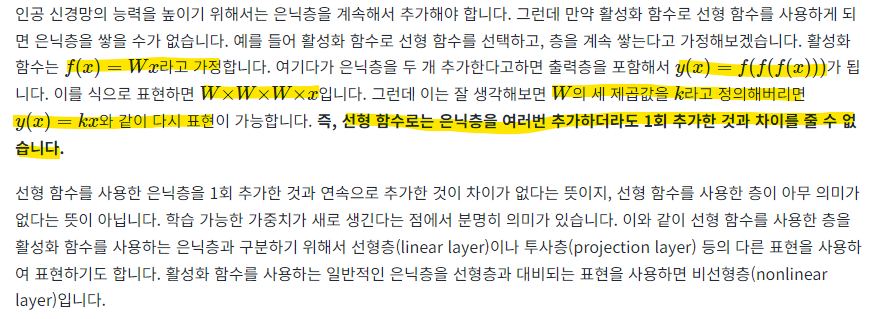



#2. 시그모이드 함수(Sigmoid function)와 기울기 소실

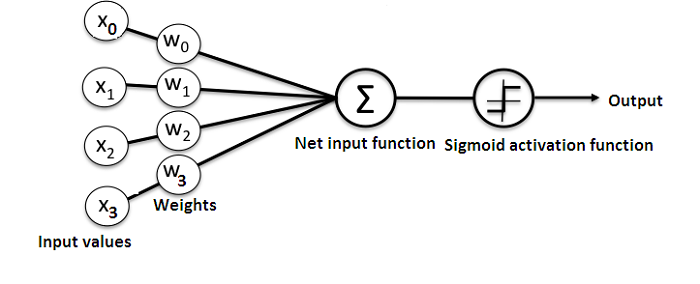

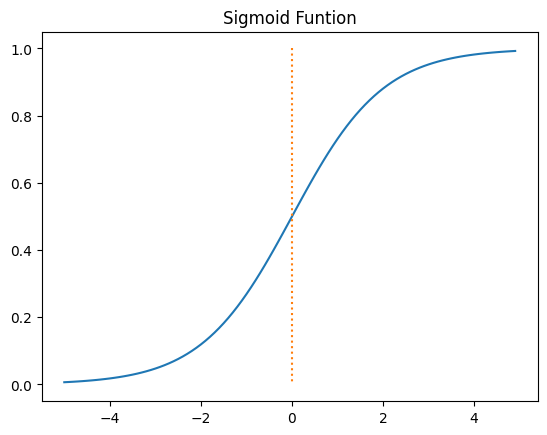

In [ ]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
  return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Funtion')
plt.show()

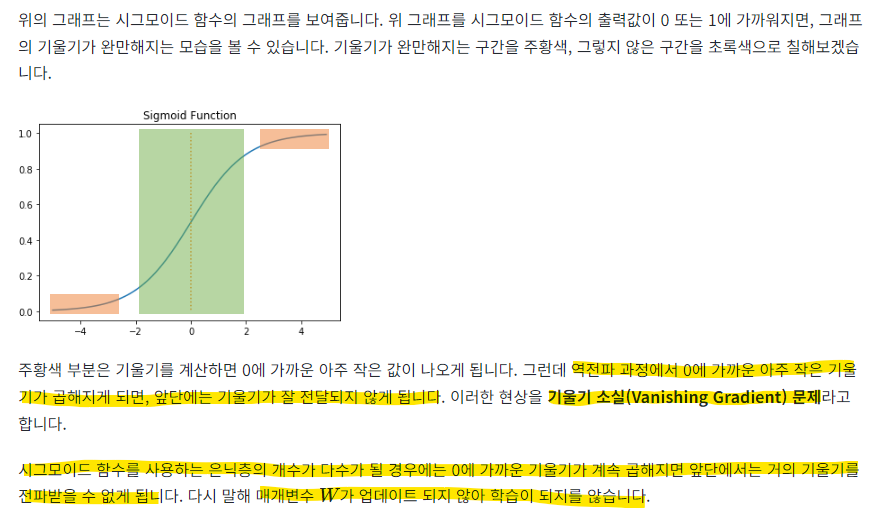

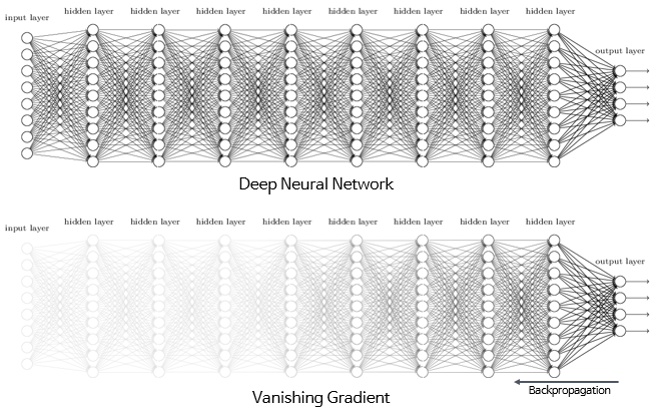

#3. Hyperbolic tangent function

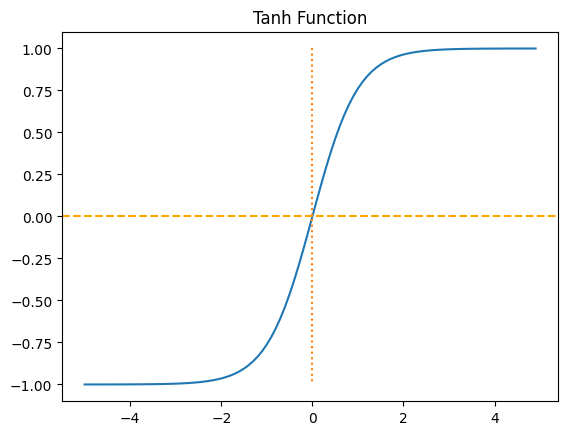

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x,y)
plt.plot([0,0], [1.0, -1.0], ':')
plt.axhline(y = 0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

#4. 렐루 함수(ReLU)

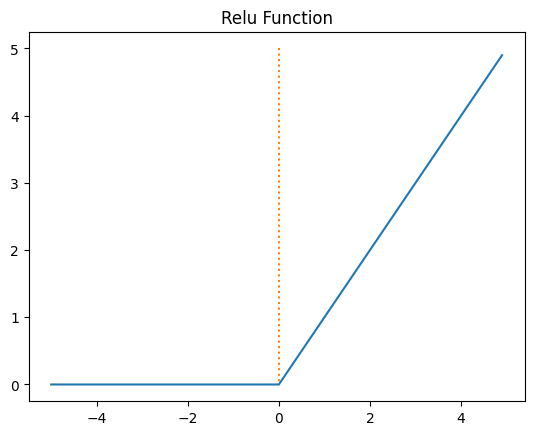

In [ ]:
def relu(x):
  return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Relu Function')
plt.show()

렐루 함수는 특정 양수값에 수렴하지 않으므로 딥러닝에서 시그모이드 함수보다 훨씬 더 잘 작동함.

뿐만 아니라, 렐루 함수는 시그모이드 함수와 하이퍼볼릭탄젠트 함수와 같이 어떤 연산이 필요한 것이 아니라 단순 임계값이므로 연산 속도도 빠름

문제점 : 입력값이 음수면 기울기도 0. 그리고 이 뉴런은 다시 회생하는 것이 매우 어려움. 이러한 문제를 죽은 렐루(dying ReLU)라고 함.

#5. Leaky ReLU

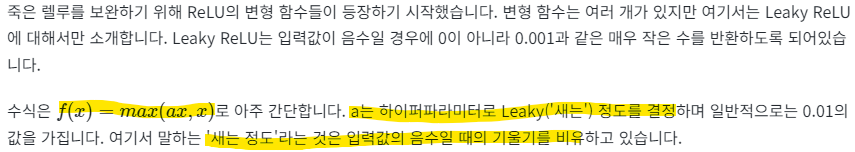

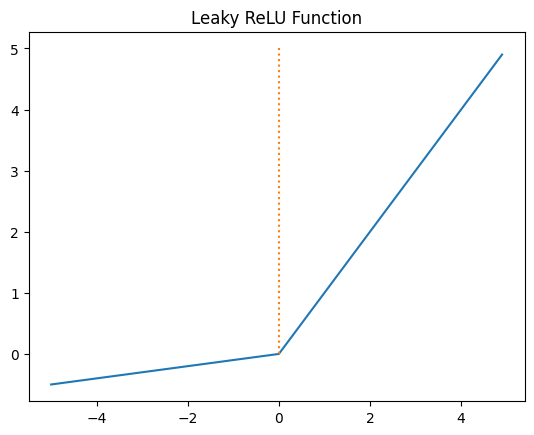

In [ ]:
a = 0.1 # 보통 0.01로 잡으나, 그래프에서 차이를 보여주기 위해 0.1로 설정함.

def leaky_relu(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0], [5.0,0.0],':')
plt.title('Leaky ReLU Function')
plt.show()

#6. Softmax function

은닉층에서 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적이지만 시그모이드 함수나 스프트맥스 함수가 사용되지 않는 것은 아님. 분류문제를 로지스틱 회귀와 스트맥스 회구를 출력층에 적용하여 사용

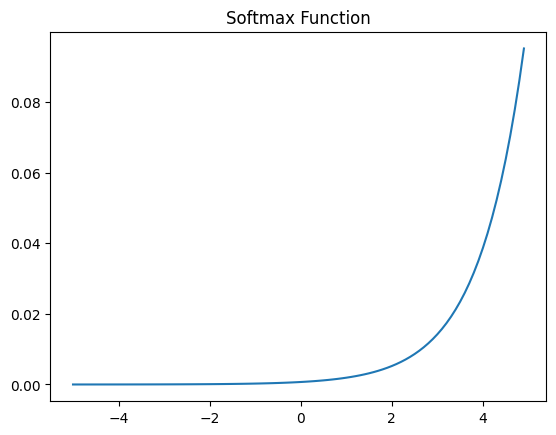

In [ ]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

시그모이드 함수가 두 가지 선택지 중 하나를 고르는 Binary Classification 문제에 사용된다면, 소프트맥스 함수는 세 가지 이상의 선택지 중 하나를 고르는 MultiClass Classification 문제에 주로 사용

#7. 출력층의 활성화 함수와 오차 함수의 관계

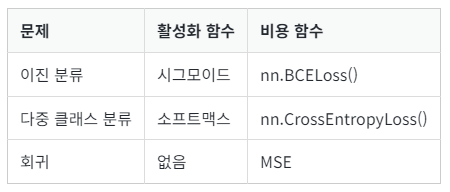

https://excelsior-cjh.tistory.com/177

**시그모이드 함수**
- 시그모이드 함수의 또 다른 문제점은 원점 중심이 아니라는 점(Not zero-centered)

- 따라서 평균이 0이 아니라 0.5이며 시그모이드 함수는 항상 양수를 출력하기 때문에 출력의 가중치 합이 입력의 가중치 합보다 커질 가능성이 높음. -> Bias shift(편향이동)

- 각 레이어를 지날 때마다 분산이 계속 커져 가장 높은 레이어에서는 활서오하 함수의 출력이 0이나 1로 수렴하게 되어 기울기 소실 문제가 일어날 수 있음.

**하이퍼볼릭탄젠트 함수**

- 원점 중심(zero-centered)이기 때문에, 시그모이드와 달리 편향 이동은 일어나지 않음.

- 하이퍼볼릭탄젠트 함수 또한 입력의 절대값이 클 경우 -1 이나 1로 수렴하게 되는데 시그모이드 함수와 마찬가지로 이 때 기울기가 완만해지므로 기울기 소실 문제가 일어남

**스탠보드 대학교 딥러닝강의 cs231n에서는 ReLU를 먼저 시도해보고, 그 다음으로 LeakyReLU나 ELU같은 ReLU 변형을 시도해보며, sigmoid는 사용하지 말라고 권장함.**